<a href="https://colab.research.google.com/github/aniltiwari9696293716-cpu/Customer-Segmentation-Analysis/blob/main/Client_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Shopping_Trends_FULL_Project .csv to Shopping_Trends_FULL_Project .csv


In [ ]:
uploaded


{'Shopping_Trends_FULL_Project .csv': b'Purchase_Amount_USD,Item_Purchased,Category,Review_Rating,Subscription_Status,Previous_Purchases,Frequency_of_Purchases,Location,Season,Age,Gender,Payment_Method,Discount_Applied\r\n685.61,Shoes,Beauty,2,Not Subscribed,30,Weekly,Houston,Winter,29,Male,PayPal,No\r\n1670.7,T-shirt,Books,2,Subscribed,50,Daily,Miami,Summer,29,Female,UPI,No\r\n1000.46,Camera,Beauty,5,Subscribed,6,Daily,Houston,Winter,47,Female,Cash,No\r\n386.03,Watch,Electronics,1,Subscribed,20,Monthly,Chicago,Summer,23,Female,Cash,No\r\n160.48,Smartphone,Books,2,Not Subscribed,22,Daily,Houston,Autumn,53,Female,Cash,No\r\n881.45,Backpack,Electronics,1,Subscribed,20,Monthly,Chicago,Winter,39,Male,Credit Card,No\r\n1448.33,Camera,Electronics,1,Not Subscribed,17,Weekly,Los Angeles,Spring,53,Female,Debit Card,No\r\n235.98,Perfume,Beauty,2,Not Subscribed,32,Monthly,Chicago,Autumn,35,Female,Cash,No\r\n1117.35,T-shirt,Clothing,1,Not Subscribed,24,Weekly,Chicago,Winter,41,Male,UPI,No\r\n2464.

File name want do to confirm

In [ ]:
import os
os.listdir()


['.config', 'Shopping_Trends_FULL_Project .csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("Shopping_Trends_FULL_Project .csv")
df.head()





,Purchase_Amount_USD,Item_Purchased,Category,Review_Rating,Subscription_Status,Previous_Purchases,Frequency_of_Purchases,Location,Season,Age,Gender,Payment_Method,Discount_Applied
0,685.61,Shoes,Beauty,2,Not Subscribed,30,Weekly,Houston,Winter,29,Male,PayPal,No
1,1670.70,T-shirt,Books,2,Subscribed,50,Daily,Miami,Summer,29,Female,UPI,No
2,1000.46,Camera,Beauty,5,Subscribed,6,Daily,Houston,Winter,47,Female,Cash,No
3,386.03,Watch,Electronics,1,Subscribed,20,Monthly,Chicago,Summer,23,Female,Cash,No
4,160.48,Smartphone,Books,2,Not Subscribed,22,Daily,Houston,Autumn,53,Female,Cash,No


 Load & Inspect Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Columns:\n", df.columns)
df.head()


Columns:
 Index(['Purchase_Amount_USD', 'Item_Purchased', 'Category', 'Review_Rating',
       'Subscription_Status', 'Previous_Purchases', 'Frequency_of_Purchases',
       'Location', 'Season', 'Age', 'Gender', 'Payment_Method',
       'Discount_Applied'],
      dtype='object')


,Purchase_Amount_USD,Item_Purchased,Category,Review_Rating,Subscription_Status,Previous_Purchases,Frequency_of_Purchases,Location,Season,Age,Gender,Payment_Method,Discount_Applied
0,685.61,Shoes,Beauty,2,Not Subscribed,30,Weekly,Houston,Winter,29,Male,PayPal,No
1,1670.70,T-shirt,Books,2,Subscribed,50,Daily,Miami,Summer,29,Female,UPI,No
2,1000.46,Camera,Beauty,5,Subscribed,6,Daily,Houston,Winter,47,Female,Cash,No
3,386.03,Watch,Electronics,1,Subscribed,20,Monthly,Chicago,Summer,23,Female,Cash,No
4,160.48,Smartphone,Books,2,Not Subscribed,22,Daily,Houston,Autumn,53,Female,Cash,No


In [ ]:
df.shape

(60, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Purchase_Amount_USD     60 non-null     float64
 1   Item_Purchased          60 non-null     object 
 2   Category                60 non-null     object 
 3   Review_Rating           60 non-null     int64  
 4   Subscription_Status     60 non-null     object 
 5   Previous_Purchases      60 non-null     int64  
 6   Frequency_of_Purchases  60 non-null     object 
 7   Location                60 non-null     object 
 8   Season                  60 non-null     object 
 9   Age                     60 non-null     int64  
 10  Gender                  60 non-null     object 
 11  Payment_Method          60 non-null     object 
 12  Discount_Applied        60 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 6.2+ KB


In [ ]:
df.describe()

,Purchase_Amount_USD,Review_Rating,Previous_Purchases,Age
count,60.00000,60.000000,60.000000,60.000000
mean,1314.68900,2.800000,27.016667,38.950000
std,699.08818,1.560096,15.597144,14.577002
min,139.01000,1.000000,0.000000,18.000000
25%,774.48000,1.000000,17.000000,27.250000
50%,1325.01000,3.000000,24.500000,37.000000
75%,1958.48500,4.000000,40.250000,50.000000
max,2464.26000,5.000000,50.000000,65.000000


In [ ]:
df.columns

Index(['Purchase_Amount_USD', 'Item_Purchased', 'Category', 'Review_Rating',
       'Subscription_Status', 'Previous_Purchases', 'Frequency_of_Purchases',
       'Location', 'Season', 'Age', 'Gender', 'Payment_Method',
       'Discount_Applied'],
      dtype='object')

1)	Identify the product categories where discounts should be applied. Provide your reasoning.

CATEGORY-WISE DISCOUNT ANALYSIS

In [ ]:
category_summary = df.groupby("Category").agg({
    "Purchase_Amount_USD": "sum",
    "Previous_Purchases": "sum",
    "Review_Rating": "mean",
    "Frequency_of_Purchases": "count"     # FIXED - count instead of mean
}).reset_index()

print(category_summary)

      Category  Purchase_Amount_USD  Previous_Purchases  Review_Rating  \
0  Accessories             11162.86                 182       3.428571   
1       Beauty             18379.35                 435       2.571429   
2        Books             17632.75                 497       2.888889   
3     Clothing             19269.09                 265       2.636364   
4  Electronics             12437.29                 242       2.700000   

   Frequency_of_Purchases  
0                       7  
1                      14  
2                      18  
3                      11  
4                      10  


Plot Purchase Amount by Category

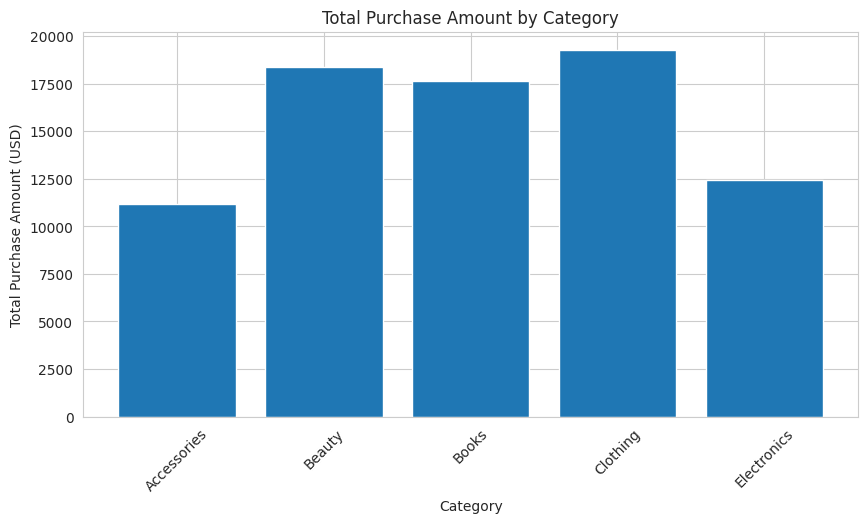

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(category_summary["Category"], category_summary["Purchase_Amount_USD"])
plt.xticks(rotation=45)
plt.title("Total Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

Discount rule: lower than average → discount recommended

In [ ]:
category_summary["Discount_Recommended"] = (
    category_summary["Purchase_Amount_USD"] < category_summary["Purchase_Amount_USD"].mean()
)

category_summary

,Category,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Frequency_of_Purchases,Discount_Recommended
0,Accessories,11162.86,182,3.428571,7,True
1,Beauty,18379.35,435,2.571429,14,False
2,Books,17632.75,497,2.888889,18,False
3,Clothing,19269.09,265,2.636364,11,False
4,Electronics,12437.29,242,2.700000,10,True


2)	Identify card spending based on age and explore the impact of seasons and locations.

Age and Payment Method Analysis

In [ ]:
age_spending = df.groupby("Age")["Purchase_Amount_USD"].sum().reset_index()


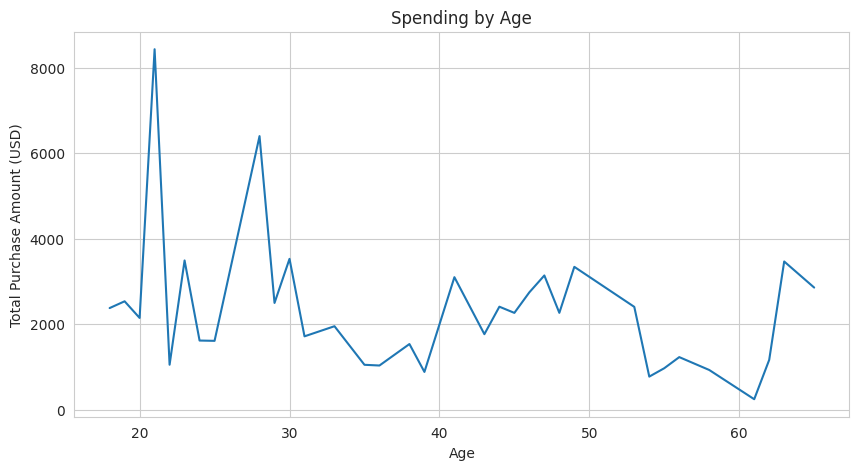

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(age_spending["Age"], age_spending["Purchase_Amount_USD"])
plt.title("Spending by Age")
plt.xlabel("Age")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()


Payment Method Analysis



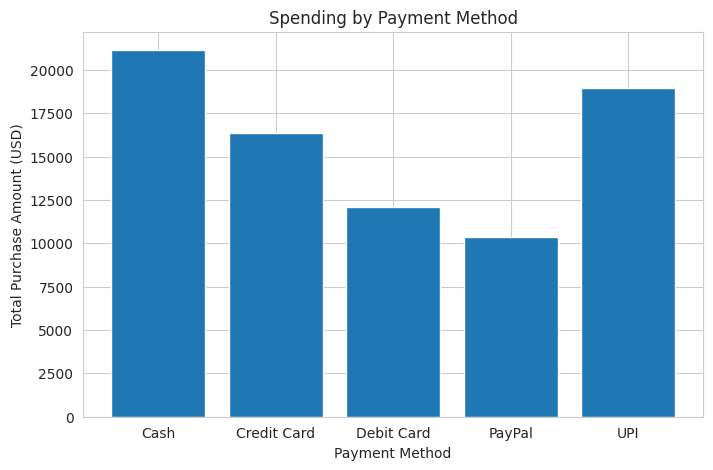

In [ ]:
payment_spending = df.groupby("Payment_Method")["Purchase_Amount_USD"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(payment_spending["Payment_Method"], payment_spending["Purchase_Amount_USD"])
plt.title("Spending by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

Age + Season Effect

In [ ]:
age_season = df.groupby(["Age", "Season"])["Purchase_Amount_USD"].mean().reset_index()
print(age_season.head())

   Age  Season  Purchase_Amount_USD
0   18  Summer              2375.64
1   19  Autumn               526.81
2   19  Summer              2007.35
3   20  Summer              2144.84
4   21  Autumn              1789.45


Customer Clustering (Age, Gender, Spending, Frequency)

Encode categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
enc = LabelEncoder()

df_encoded["Gender"] = enc.fit_transform(df["Gender"])
df_encoded["Category"] = enc.fit_transform(df["Category"])
df_encoded["Payment_Method"] = enc.fit_transform(df["Payment_Method"])
df_encoded["Season"] = enc.fit_transform(df["Season"])
df_encoded["Location"] = enc.fit_transform(df["Location"])


Select clustering features

In [ ]:
features = df_encoded[[
    "Age",
    "Purchase_Amount_USD",
    "Previous_Purchases",
    "Frequency_of_Purchases",
    "Gender",
    "Category"
]]


Standardization


Customer Clustering

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
cluster_df = df.copy()

 Identify categorical columns

In [ ]:
cat_cols = cluster_df.select_dtypes(include=['object']).columns

Encode categorical columns

In [ ]:
le = LabelEncoder()
for col in cat_cols:
    cluster_df[col] = le.fit_transform(cluster_df[col])

Features to use for clustering

In [ ]:
features = cluster_df[
    ["Age", "Purchase_Amount_USD", "Previous_Purchases",
     "Review_Rating", "Frequency_of_Purchases",
     "Payment_Method", "Season", "Location", "Gender", "Category"]
]

Scaling

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)



KMeans clustering


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_df["Cluster"] = kmeans.fit_predict(scaled)

cluster_df.head()

,Purchase_Amount_USD,Item_Purchased,Category,Review_Rating,Subscription_Status,Previous_Purchases,Frequency_of_Purchases,Location,Season,Age,Gender,Payment_Method,Discount_Applied,Cluster
0,685.61,6,1,2,0,30,3,1,3,29,1,3,0,2
1,1670.70,8,2,2,1,50,0,3,2,29,0,4,0,0
2,1000.46,2,1,5,1,6,0,1,3,47,0,0,0,0
3,386.03,9,4,1,1,20,1,0,2,23,0,0,0,2
4,160.48,7,2,2,0,22,0,1,0,53,0,0,0,0


Cluster Visualization

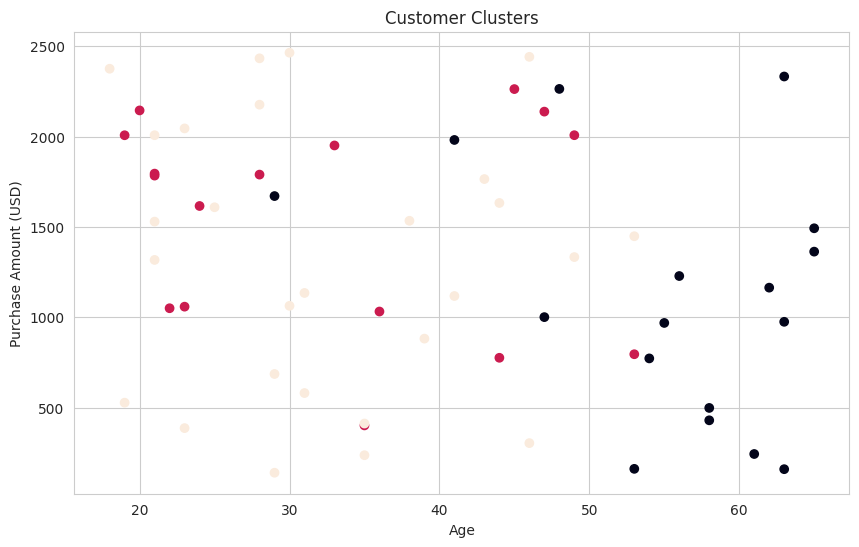

In [ ]:
plt.scatter(cluster_df["Age"], cluster_df["Purchase_Amount_USD"], c=cluster_df["Cluster"])
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Customer Clusters")
plt.show()
